### Pratik Kadam 
* CodSoft Intership Task - 4
* Spam SMS Detection

#### Importing required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")


#### Importing dataset

In [2]:
df = pd.read_csv(r"D:\CodSoft\spam detection\spam.csv" , encoding ='ISO-8859-1', usecols=[0, 1])
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [3]:
df.rename(columns={"v1":"category","v2":"message"},inplace=True)

In [4]:
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Checking Null Values

In [5]:
df.isnull().sum()

category    0
message     0
dtype: int64

* No null values are present

In [6]:
df.shape

(5572, 2)

#### Checking duplicate values

In [7]:
duplicate = df.duplicated().sum()
duplicate

403

In [8]:
df = df.drop_duplicates()
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* removed duplicated data

In [9]:
df1 = pd.DataFrame(df.message)
df1.head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


### Data Cleaning

#### Converting in Lower case

In [10]:
df1.message = df1.message.str.lower()

#### Removing URl

In [11]:
df1.message = df1.message.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 

#### Removing Punctuation

In [12]:
import string
string.punctuation

def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [13]:
df1.message = df1.message.apply(lambda x : remove_punctuation(x))  # x = Text 

#### Removing Numbers

In [14]:
 df1['message'] = df1['message'].str.replace('\d+','')  # data.text  or data['text']

#### Removing stopwords 

In [15]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

df1['message'] = df1['message'].apply(lambda x: ' '.join([abc  
                                                      for abc in x.split()
                                                      if abc not in (stop)]))

In [17]:
df1.iloc[5,0]

'freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send å£ rcv'

####  common words

In [18]:
import re # replace of words  
words = set(nltk.corpus.words.words()) # corpus & set array 

#### second round of cleaning

In [19]:

def clean_text_round2(message):
    
    message =  re.sub(r"\b[a-zA-Z]\b", "", message) ## 1 alphabet like a or s
    message =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", message)  ## 2 alphabet like ab or ad & aA
    message =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(message)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return message

In [20]:
# Let's take a look at the updated text
df1['message']=df1['message'].apply(lambda x : clean_text_round2(x))
df1 = pd.DataFrame(df1.message.apply(lambda x: clean_text_round2(x)))
df1.head()

,message
0,point crazy available great world buffet cine ...
1,lar
2,free entry win cup final may text receive entr...
3,dun say early already say
4,dont think goes around though


#### Lemitazation (converting to root word)

In [21]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

In [22]:
def lemmatize_reviewDescription(message):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(message)]

In [23]:
df1.message = df1.message.apply(lambda x :' '.join(lemmatize_reviewDescription(x)))
df1.iloc[5,0]

'hey darling word back like fun still send'

#### strip extra whitespace

In [24]:
df1['message'] = (df1['message'].astype("str").str.rstrip())

## Term Documnet Matrix

In [25]:
# We are going to create a document-term matrix using CountVectorizer,
# and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df1.message)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# One of the required inputs is a term-document matrix

tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5160,5161,5162,5163,5164,5165,5166,5167,5168,freq
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,5160,5161,5162,5163,5164,5165,5166,5167,5168,freq
0,abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
4,abnormally,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head()

,Word,freq
522,come,301
797,dont,258
1427,know,253
1048,free,245
2313,send,237


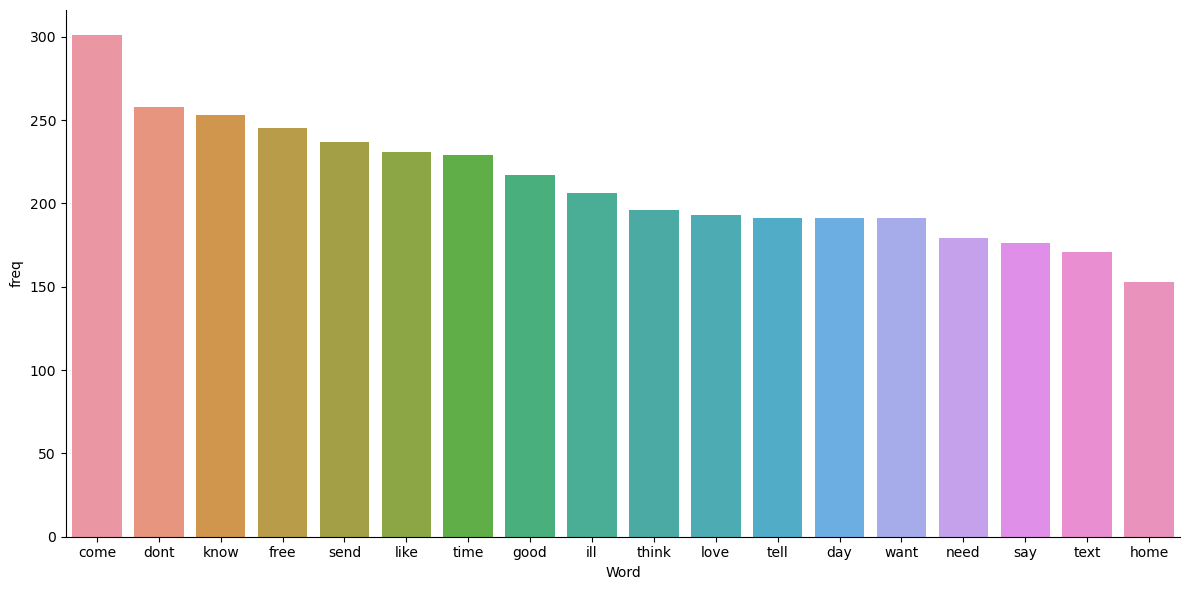

In [29]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=150] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [30]:
df2 = df1

In [31]:
df2 = df2.rename(columns={"message":"cleaned message"})

#### Combining Dataset 

In [32]:
df_new = pd.concat([df,df2],axis=1)

In [33]:
df_new.head()

,category,message,cleaned message
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available great world buffet cine ...
1,ham,Ok lar... Joking wif u oni...,lar
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry win cup final may text receive entr...
3,ham,U dun say so early hor... U c already then say...,dun say early already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",dont think go around though


In [34]:
Qualitative_Variable = df_new[df_new.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,category,message,cleaned message
0,ham,"Go until jurong point, crazy.. Available only ...",point crazy available great world buffet cine ...
1,ham,Ok lar... Joking wif u oni...,lar
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry win cup final may text receive entr...


#### Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,category,message,cleaned message
0,0,1079,2908
1,0,3101,2157
2,1,1000,1246
3,0,4088,1024
4,0,2757,962


In [36]:
Final = Qualitative_Variable

#### Splitting Dataset

In [37]:
from sklearn.model_selection import train_test_split

X = Final.drop('category', axis = 1)
Y = Final[['category']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=56)

## Model Building

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [39]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,message,cleaned message,category
2822,3931,163,0
3829,1691,37,0
3644,5124,1392,1
507,4870,2130,0
4344,901,1062,0


In [40]:
train['Predicted']=output.predict(X_train)
train.tail(3)

,message,cleaned message,category,Predicted
3455,3149,2023,0,0
406,216,4392,0,0
2648,1523,2894,0,0


In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['category'])
matrix

array([[3160,  458],
       [   0,    0]], dtype=int64)

#### Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'], train['category']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3618
           1       0.00      0.00      0.00         0

    accuracy                           0.87      3618
   macro avg       0.50      0.44      0.47      3618
weighted avg       1.00      0.87      0.93      3618



* Accuracy of Train data = 87%

In [43]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,message,cleaned message,category
3119,1116,1537,0
176,4117,3566,0
5356,3765,3769,0
3354,2670,2504,0
2394,1779,951,0


In [44]:
test['Predicted']=output.predict(X_test)
test.head()

,message,cleaned message,category,Predicted
3119,1116,1537,0,0
176,4117,3566,0,0
5356,3765,3769,0,0
3354,2670,2504,0,0
2394,1779,951,0,0


In [45]:
matrix = confusion_matrix(test['Predicted'], test['category'])
matrix

array([[1356,  195],
       [   0,    0]], dtype=int64)

#### Classification Report

In [46]:
print(classification_report(test['Predicted'], test['category']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1551
           1       0.00      0.00      0.00         0

    accuracy                           0.87      1551
   macro avg       0.50      0.44      0.47      1551
weighted avg       1.00      0.87      0.93      1551



* Accuracy of test data = 87%

### Naiive Bayes

#### Model Building

In [47]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

model= BernoulliNB(alpha=0)  

model.fit(X_train, y_train)

BernoulliNB(alpha=0)

In [48]:
train1=pd.concat([X_train,y_train],axis=1)
train1.head()

,message,cleaned message,category
2822,3931,163,0
3829,1691,37,0
3644,5124,1392,1
507,4870,2130,0
4344,901,1062,0


In [49]:
train1['Probability']=model.predict_proba(X_train)[:,1]
train1['Predicted']=np.where(train1['Probability'] >= 0.7,1,0)  #thershold  >0.7
train1.head()

,message,cleaned message,category,Probability,Predicted
2822,3931,163,0,0.129215,0
3829,1691,37,0,0.129215,0
3644,5124,1392,1,0.129215,0
507,4870,2130,0,0.129215,0
4344,901,1062,0,0.129215,0


In [50]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train1['Predicted'],train1['category'])
print(matrix)

[[3160  458]
 [   0    0]]


In [51]:
accuracy = ((3160)/(3160+458))*100
accuracy

87.34107241569929

#### Classification Report

In [52]:
print(classification_report(train1['category'], train1['Predicted']))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3160
           1       0.00      0.00      0.00       458

    accuracy                           0.87      3618
   macro avg       0.44      0.50      0.47      3618
weighted avg       0.76      0.87      0.81      3618



* Accuracy of train data = 87%

In [53]:
test1=pd.concat([X_test,y_test],axis=1)
test1.head()

,message,cleaned message,category
3119,1116,1537,0
176,4117,3566,0
5356,3765,3769,0
3354,2670,2504,0
2394,1779,951,0


In [54]:
test1['Probability']=model.predict_proba(X_test)[:,1]
test1['Predicted']=np.where(test1['Probability'] >= 0.7,1,0)  #thershold  >0.7
test1.head()

,message,cleaned message,category,Probability,Predicted
3119,1116,1537,0,0.129215,0
176,4117,3566,0,0.129215,0
5356,3765,3769,0,0.129215,0
3354,2670,2504,0,0.129215,0
2394,1779,951,0,0.129215,0


#### Classification Report

In [55]:
print(classification_report(test['Predicted'],test1['category']))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1551
           1       0.00      0.00      0.00         0

    accuracy                           0.87      1551
   macro avg       0.50      0.44      0.47      1551
weighted avg       1.00      0.87      0.93      1551



* Accuracy of test data = 87%

### SVM

#### Model Building

In [56]:
from sklearn.svm import SVC

model = SVC(kernel="linear") 
model.fit(X_train, y_train) 

SVC(kernel='linear')

In [57]:
model.support_vectors_        #these are support vector

array([[4961., 2593.],
       [3329., 3528.],
       [ 553., 4283.],
       ...,
       [4098., 2907.],
       [4128., 3256.],
       [1704., 1944.]])

In [58]:
np.round(model.intercept_,1)   #bias  ( intercept`)

array([11.7])

In [59]:
np.round(model.coef_,1)  

array([[-0., -0.]])

In [60]:
train3=pd.concat([X_train,y_train],axis=1)
train3.head()

,message,cleaned message,category
2822,3931,163,0
3829,1691,37,0
3644,5124,1392,1
507,4870,2130,0
4344,901,1062,0


In [61]:
train3['Prediction']=model.predict(X_train)
train3.head()

,message,cleaned message,category,Prediction
2822,3931,163,0,0
3829,1691,37,0,0
3644,5124,1392,1,0
507,4870,2130,0,0
4344,901,1062,0,0


#### Classification Report

In [62]:
print(classification_report(train3['Prediction'], train3['category']))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3510
           1       0.02      0.07      0.03       108

    accuracy                           0.85      3618
   macro avg       0.49      0.47      0.47      3618
weighted avg       0.94      0.85      0.89      3618



* Accuracy of train data = 85%

In [63]:
test3 = pd.concat([X_test,y_test],axis=1)
test3.head()

,message,cleaned message,category
3119,1116,1537,0
176,4117,3566,0
5356,3765,3769,0
3354,2670,2504,0
2394,1779,951,0


In [64]:
test3['Prediction']=model.predict(X_test)
test3.head()

,message,cleaned message,category,Prediction
3119,1116,1537,0,0
176,4117,3566,0,0
5356,3765,3769,0,0
3354,2670,2504,0,0
2394,1779,951,0,0


#### Classification Report

In [65]:
print(classification_report(test3['Prediction'], test3['category']))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1508
           1       0.02      0.09      0.03        43

    accuracy                           0.85      1551
   macro avg       0.50      0.48      0.48      1551
weighted avg       0.94      0.85      0.90      1551



* Accuracy of test data = 85%

Used Algorithm :

    1. logistic Regression 
       train accuracy : 87%
       test accuracy : 87%
       
    2. Naiive Bayes 
       train accuracy : 87%
       test accuracy : 87%
        
    3. Support vector Machine
       train accuracy : 85%
       test accuracy : 85%

* Best Model for the Dataset from used algorithm: 

1) Logistic Regression
2) Naiive Bayes

### END